### Import all required packages

In [190]:
import numpy as np
import os
import time
import torch 
import argparse
import torch.nn as nn
from torchvision.datasets import MNIST
import matplotlib.animation as animation 
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.nn.functional import one_hot
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from preprocessing import batch_elastic_transform
from model import PrototypeModel, HierarchyModel
from train import train_MNIST, load_and_test

### Set the deticated training device

In [191]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load previously trained models

In [192]:
# load fully trained models
hierarchy_model_path = './hierarchical1/models/final.pth'
standard_model_path = './normal1/models/final.pth'

hierarchy_model = torch.load(model_path, map_location=torch.device(device))
standard_model = torch.load(model_path, map_location=torch.device(device))

### Define function for visualization

In [193]:
def show_prototypes(prototype_set, **kwargs):
    fig, ax = plt.subplots(len(prototype_set)//5 ,5)
    col = 0
    for i, img in enumerate(prototype_set):
        if i % 5 == 0 and i != 0:
            col += 1
        ax[col,i%5].imshow(img[0])

# Standard model

### Results

In [194]:
# Fetch and convert prototypes
standard_prototypes = standard_model.prototype.get_prototypes()
standard_prototype_img = model.decoder(standard_prototypes.view(-1, 10, 2, 2))

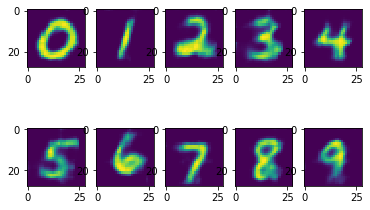

In [195]:
# show prototypes
show_prototypes(standard_prototype_img.cpu().detach().numpy())

### Test model

In [196]:
load_and_test(standard_model_path, hierarchical = False)

Testdata loss: 4.020529967546463 acc: 0.9878999999999998 sub acc: 0.0


### Results

In [197]:
prototypes = model.prototype.get_prototypes()
sub_prototypes = model.prototype.get_sub_prototypes()

In [198]:
# convert the prototypes
prototype_img = model.decoder(prototypes.view(-1, 10, 2, 2))
sub_prototype_img = model.decoder(sub_prototypes.view(-1, 10, 2, 2))


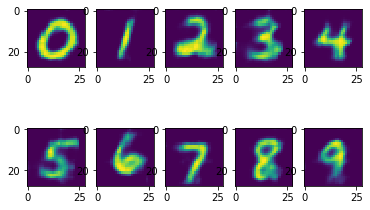

In [199]:
# show prototypes
show_prototypes(prototype_img.cpu().detach().numpy())

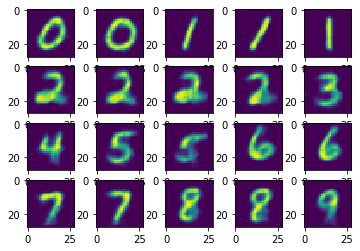

In [200]:
# show sorted subprototypes
_, decoding, (sub_c, sup_c, r1, r2, r3, r4)  = model(sub_prototype_img)
pred = torch.argmax(sub_c, dim=1)
merged = zip(pred, sub_prototype_img.cpu().detach().numpy())
mergedlist = list(merged)
mergedlist.sort(key=lambda x: x[0])
imgs = np.array([x[1] for x in mergedlist])
show_prototypes(imgs)

### Test model

In [201]:
load_and_test(model_path, hierarchical)

Testdata loss: 6.47433979511261 acc: 0.9885999999999997 sub acc: 0.9902
